In [20]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd
import os

csv_path = os.path.join(os.getcwd(), 'code_gpus', 'twitter-elon-tesla-bert.csv')
df = pd.read_csv(csv_path)
print(df.columns)
selected_columns = df[['Cleaned_Tweets', 'sentiment_score_bert']]

Index(['User', 'Username', 'UTC Date', 'post', 'Binders', 'Permalink',
       'reposts', 'Likes count', 'Impressions', 'Quotes', 'Replies',
       'Bookmarks', 'post value', 'Cleaned_Tweets', 'sentiment_score_bert'],
      dtype='object')


In [32]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
df['Subjectivity'] = df['post'].apply(getSubjectivity)


def categorize_sentiment(value):
    if value in [1, 2]:
        return 'Negative'
    elif value == 3:
        return 'Neutral'
    else:
        return 'Positive'
df['Sentiment'] = df['sentiment_score_bert'].apply(categorize_sentiment)
df.head()
    

,User,Username,UTC Date,post,Binders,Permalink,reposts,Likes count,Impressions,Quotes,Replies,Bookmarks,post value,Cleaned_Tweets,sentiment_score_bert,Subjectivity,Polarity,Sentiment
0,aHoy,@BrandonLeong3,2023-04-01 23:59:53,@Chrysto @elonmusk @Tesla Your burning passion...,NaN,https://www.twitter.com/user/status/1642315880...,0,0,1257,0,0,0,0.07,Your burning passion for tesla ….paid off in a...,5,0.0,Positive,Positive
1,victoria,@starveiRL,2023-04-01 23:59:46,i deleted that tweet cs i think an elon musk f...,NaN,https://www.twitter.com/user/status/1642315850...,0,0,22,0,0,0,0.00,i deleted that tweet cs i think an elon musk f...,1,0.0,Negative,Negative
2,Frances Caso,@frances_caso,2023-04-01 23:59:44,@elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...,NaN,https://www.twitter.com/user/status/1642315843...,0,1,8,0,0,0,0.00,ELON; THANK ~YOU FOR HAVING “Carlos Rodriguez...,5,0.0,Positive,Positive
3,DavidRowe ⧖ - #WATON,@DavidRoweWTL,2023-04-01 23:59:43,@GerberKawasaki @garyblack00 @farzyness @Tesla...,NaN,https://www.twitter.com/user/status/1642315838...,0,3,434,0,1,0,3.39,You aren't arguing that Tesla can't extend its...,3,0.5,Neutral,Neutral
4,The Green Living Guy,@greenlivingguy,2023-04-01 23:59:37,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315816...,1,2,18,0,0,0,14.19,"CNBC Reports Tesla Installs Over 3,000 Solar R...",5,0.0,Positive,Positive


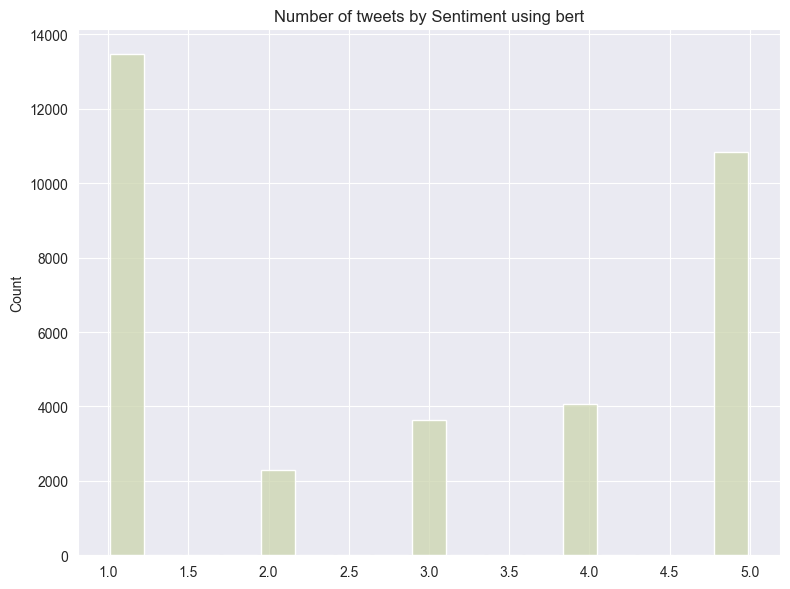

In [34]:
plt.figure(figsize = (8,6))

sns.histplot(df, x = 'sentiment_score_bert', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment using bert')

plt.tight_layout()

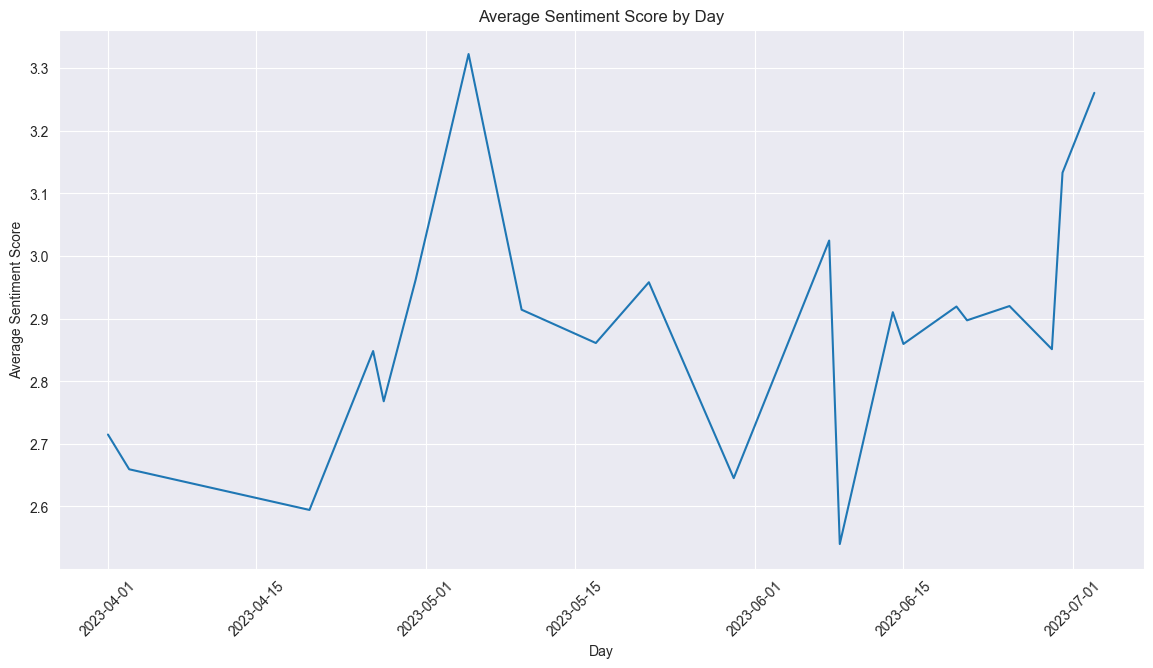

,UTC Date,sentiment_score_bert
0,2023-04-01,1.713010
1,2023-04-03,1.718326
2,2023-04-20,1.715173
3,2023-04-26,1.697327
4,2023-04-27,1.708266


In [48]:
df['UTC Date'] = pd.to_datetime(df['UTC Date'])

daily_sentiment_mean = df.groupby(df['UTC Date'].dt.date)['sentiment_score_bert'].mean().reset_index()
daily_sentiment_variance = df.groupby(df['UTC Date'].dt.date)['sentiment_score_bert'].std().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment_mean, x='UTC Date', y='sentiment_score_bert')
plt.title('Average Sentiment Score by Day')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

#daily_sentiment_mean.head()
daily_sentiment_variance.head()


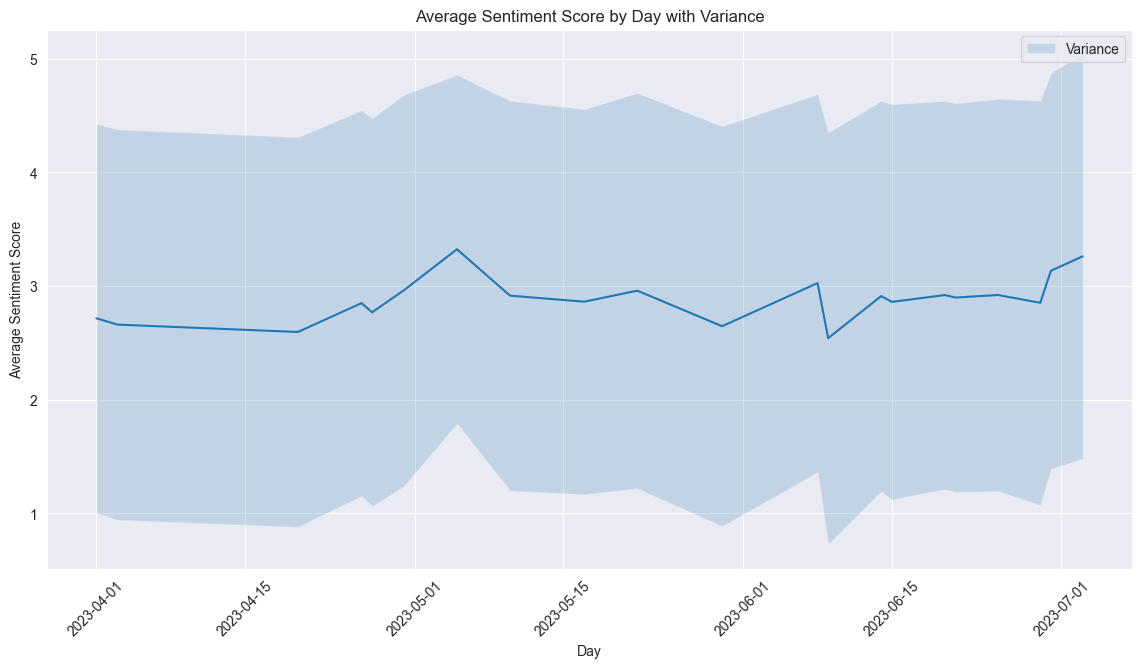

In [51]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment_mean, x='UTC Date', y='sentiment_score_bert')

dates = daily_sentiment_mean['UTC Date']
daily_means = daily_sentiment_mean['sentiment_score_bert']
daily_variance = daily_sentiment_variance['sentiment_score_bert']
# Fill the area between mean ± variance
plt.fill_between(dates, 
                 daily_means - daily_variance, 
                 daily_means + daily_variance, 
                 alpha=0.2, label='Variance')

plt.title('Average Sentiment Score by Day with Variance')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

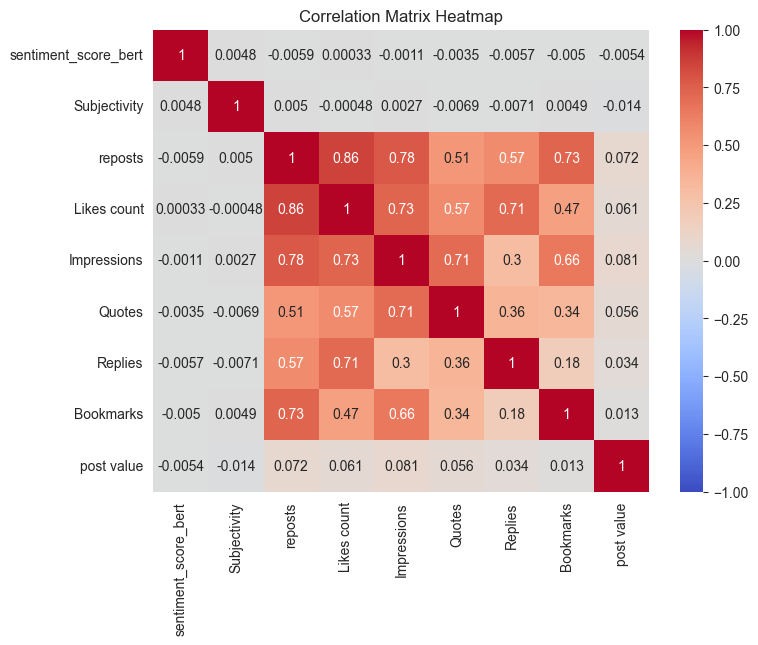

In [58]:
columns = ['sentiment_score_bert', 'Subjectivity', 'reposts', 'Likes count', 'Impressions', 'Quotes', 'Replies',
       'Bookmarks', 'post value']
correlation_matrix = df[columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()